<a href="https://colab.research.google.com/github/MartaGuzmanAlarcon/TFG_RegressionNeuralNetwork/blob/main/TFG_RegressionNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ruta al archivo en tu Google Drive
file_path = '/content/drive/MyDrive/ColabNotebooks/1_DataSet_ShortRec_FeatureVectors.csv'
#file_path = 'DataSet_ShortRec_FeatureVectors.csv'


# Cargar el CSV con tus datos
df = pd.read_csv(file_path, sep=';')
# Eliminar columna 'Type' si existe
if 'Type' in df.columns:
    df = df.drop(columns=['Type'])

# Separar variables predictoras y respuesta
print(df.columns.tolist())

X = df.drop(columns=['Class']).values
y = df['Class'].values

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Mounted at /content/drive
['Class', 'mSQI_t-1', 'mSQI_t0', 'mSQI_t1', 'PowerArm_t-1', 'PowerArm_t0', 'PowerArm_t1', 'PowerSternum_t-1', 'PowerSternum_t0', 'PowerSternum_t1']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


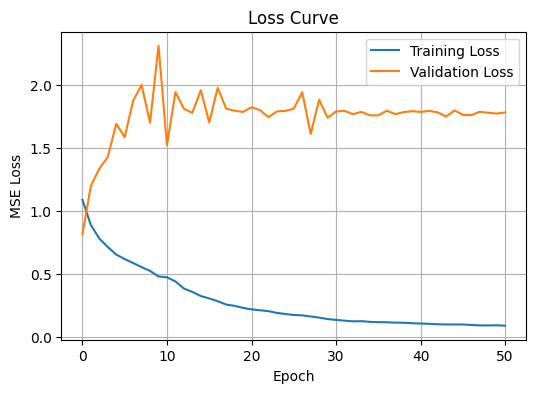

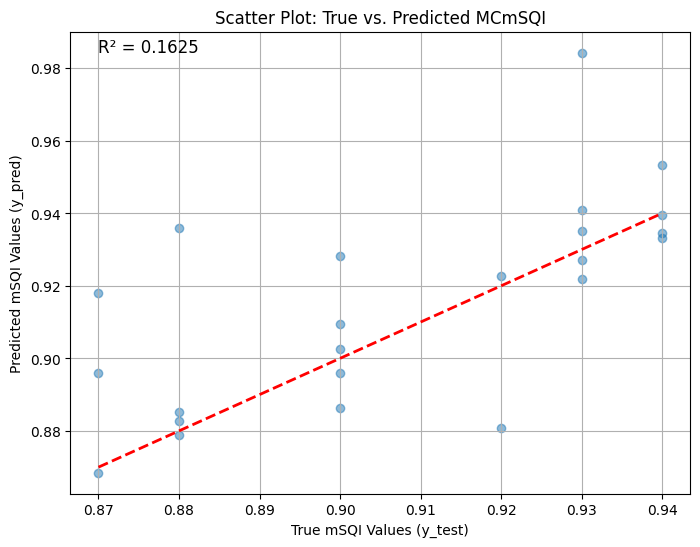

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


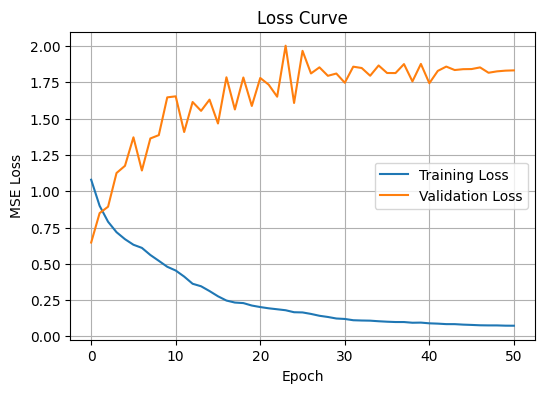

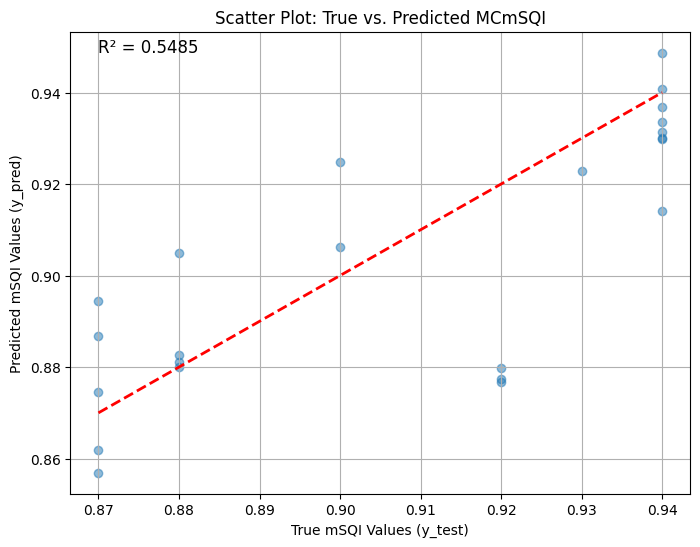

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


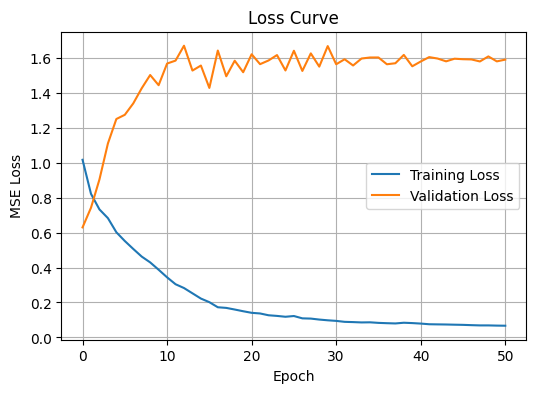

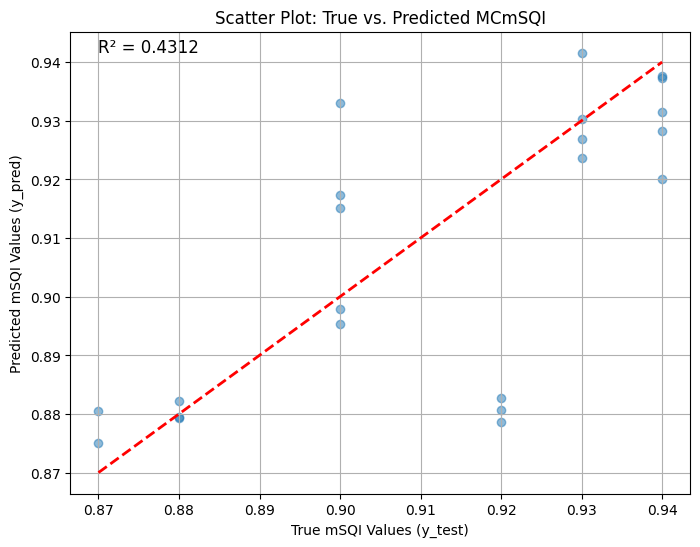

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


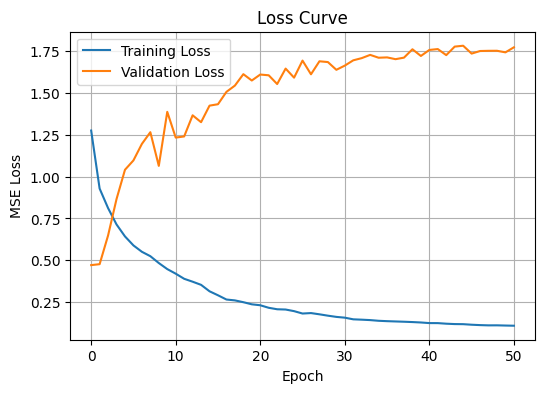

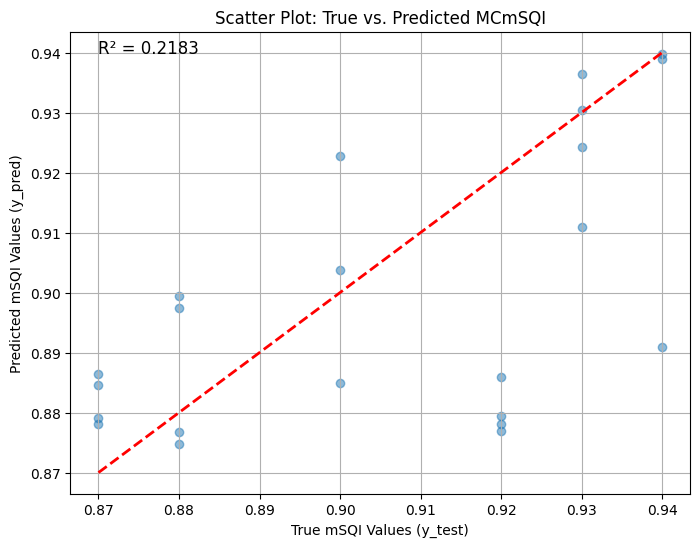

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


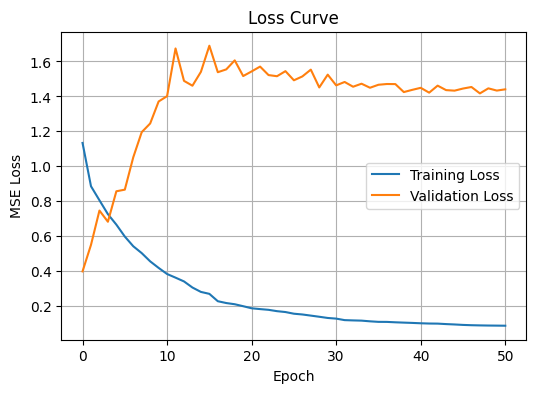

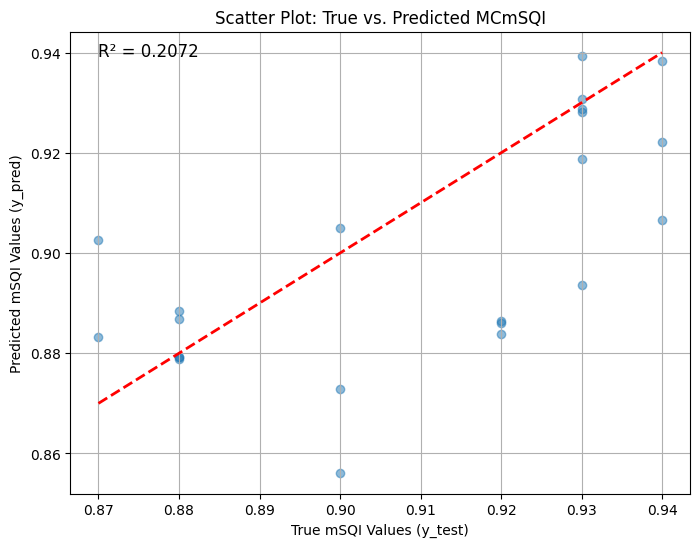

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


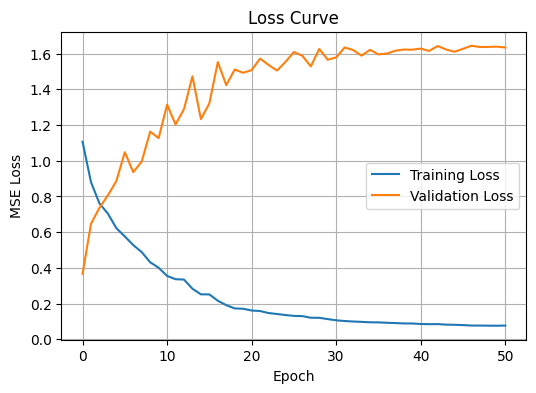

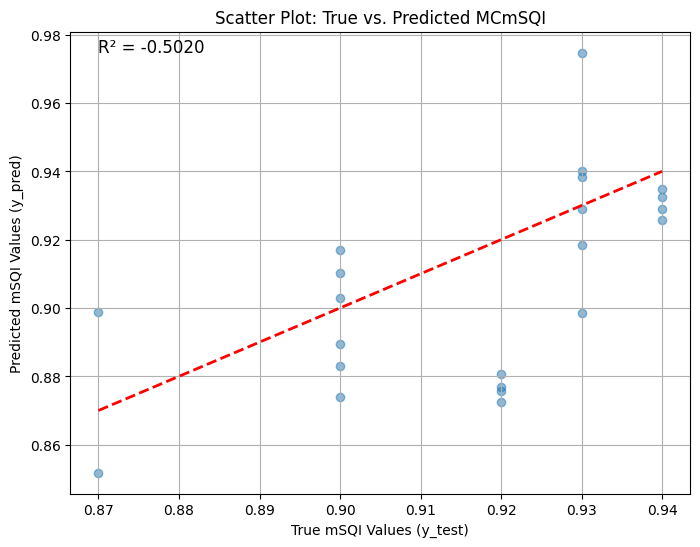

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


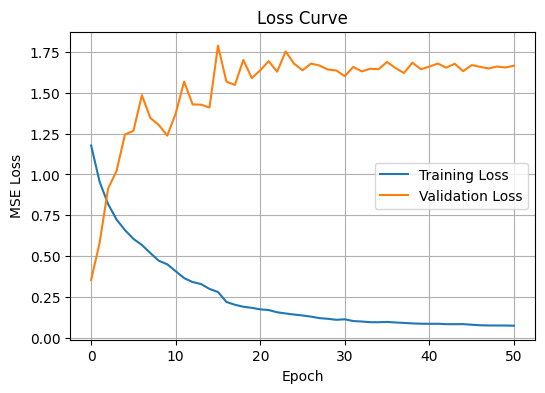

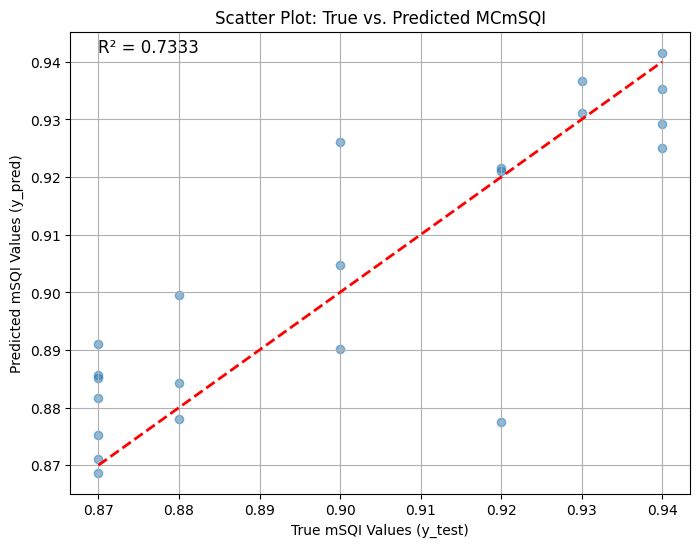

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


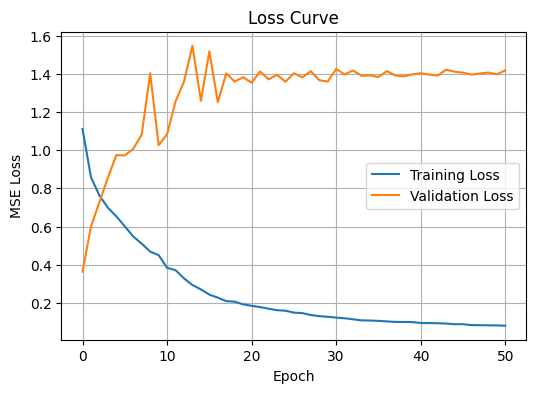

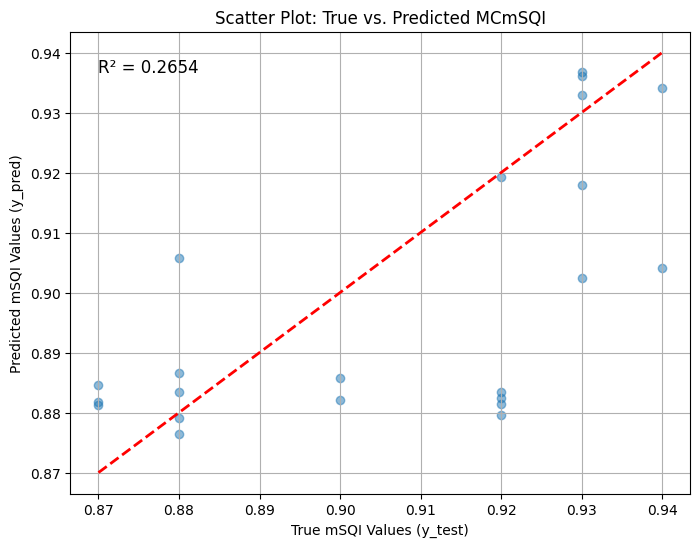

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


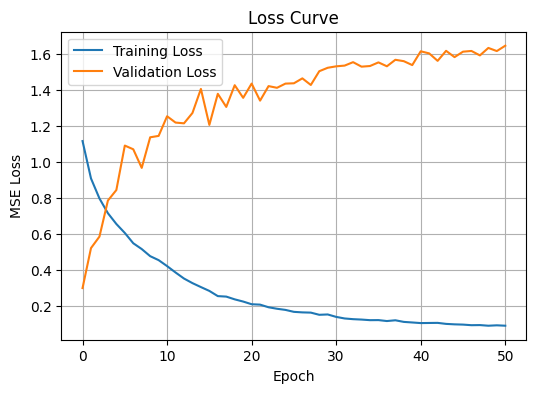

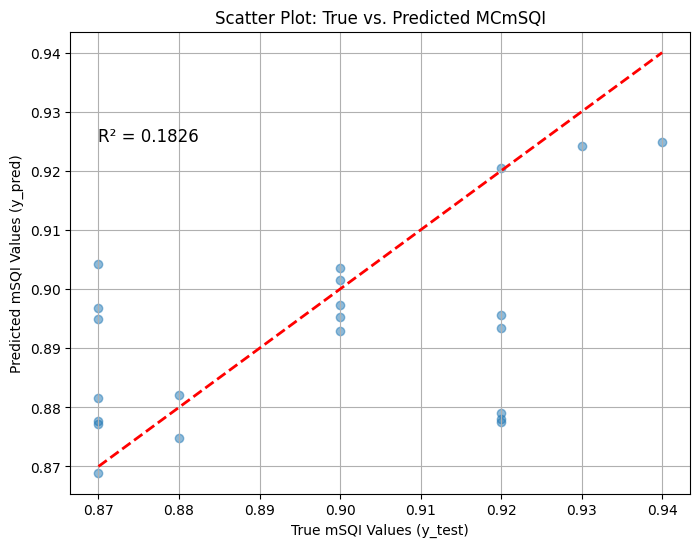

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


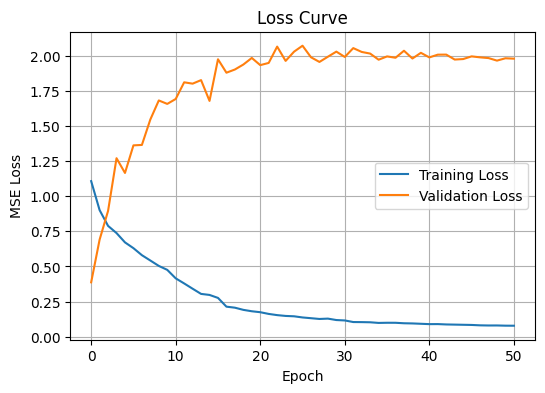

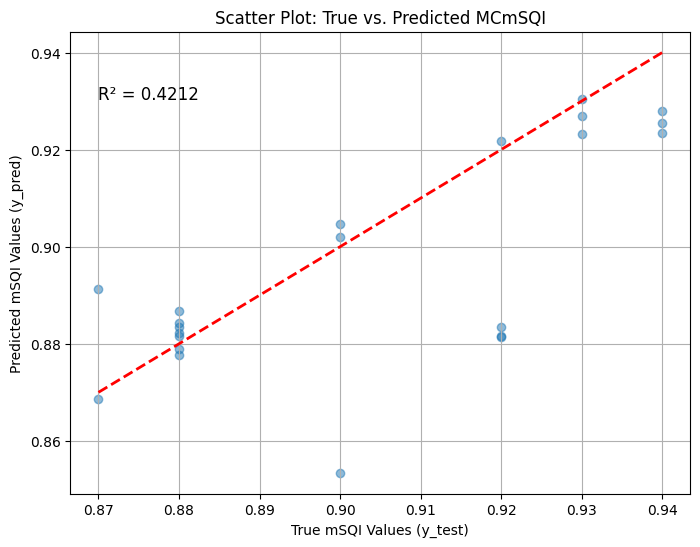

Resultados con 10 pliegues:
 - MSE promedio: 0.0004 +- 0.0001
 - R² promedio: 0.2668 +- 0.3103


In [ ]:
# Validación cruzada
n_splits = 10
plot = True
verb = 0
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Crear red neuronal
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(36, activation='relu', input_dim=input_dim))
    model.add(Dense(36, activation='relu'))
    model.add(Dense(36, activation='relu'))
    model.add(Dense(1))  # salida para regresión
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Almacenar resultados
mse_scores = []
r2_scores = []

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # Métrica a monitorear. Puedes cambiarla a 'loss' para la pérdida de entrenamiento.
    factor=0.5,         # Factor por el que se reducirá la tasa de aprendizaje (LR_nueva = LR_actual * factor).
    patience=15,         # Número de épocas sin mejora para que la LR sea reducida.
    verbose=verb           # Muestra un mensaje cuando la LR se reduce.
)

early_stopping = EarlyStopping(
    monitor='val_loss', # Métrica a monitorear.
    patience=50,        # Número de épocas sin mejora para detener el entrenamiento.
    restore_best_weights=False, # Restaura los pesos del modelo a la época con la mejor métrica monitoreada.
    verbose=verb           # Muestra un mensaje cuando el entrenamiento se detiene.
)

# Validación cruzada
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]


    y_train = scaler.fit_transform(y_train.reshape(-1, 1))
    y_test = scaler.transform(y_test.reshape(-1, 1))

    model = build_model(X_train.shape[1])
    history = model.fit(X_train, y_train, epochs=1000, batch_size=8, validation_split=0.2,
              callbacks=[reduce_lr, early_stopping], verbose=verb)

    y_pred = model.predict(X_test).flatten()

    y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

    if(plot):
      plt.figure(figsize=(6,4))
      plt.plot(history.history['loss'],     label='Training Loss')
      plt.plot(history.history['val_loss'], label='Validation Loss')
      plt.title('Loss Curve'); plt.xlabel('Epoch'); plt.ylabel('MSE Loss')
      plt.legend(); plt.grid(True); plt.show()
      # Crear el scatterplot
      plt.figure(figsize=(8, 6))
      plt.scatter(y_test, y_pred, alpha=0.5)

      # Añadir la línea de referencia (y = x)
      plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)

      # Añadir el valor de R² en el gráfico
      plt.text(y_test.min(), y_pred.max(), f'R² = {r2_score(y_test, y_pred):.4f}', fontsize=12)

      plt.xlabel("True mSQI Values (y_test)")
      plt.ylabel("Predicted mSQI Values (y_pred)")
      plt.title("Scatter Plot: True vs. Predicted MCmSQI")
      plt.grid(True)
      plt.show()

# Mostrar resultados
print(f"Resultados con {n_splits} pliegues:")
print(f" - MSE promedio: {np.mean(mse_scores):.4f} +- {np.std(mse_scores):.4f}")
print(f" - R² promedio: {np.mean(r2_scores):.4f} +- {np.std(r2_scores):.4f}")
